In [3]:
#Importer les bibliotheque 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sklearn
from sklearn import metrics
import streamlit as st
import seaborn as sns
from sklearn.model_selection import train_test_split #Pour diviser le dataset en 2, partie apprentissage et partie test
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score

In [2]:
# Mettre le nom du fichier csv a traiter dans la variable name_file
name_file='Dataset_11_poke.csv'
# Mettre le texte Fichier inconnu dans la variable err_name
err_name='Fichier inconnu'


"""
	 Treatment_1 prend en argument le nom du fichier csv à traiter,
	 Renvoie un dataFrame de ce fichier (df)

"""
def Treatment_1(name=""):
    try:        
#	Lecture du fichier csv qui a une pipe (|) comme séparateur        
        df=pd.read_csv(name_file,sep='|')
    except:
        print(err_name) 
    return df


In [4]:
"""
 Dans la fonction Treatment_2, nous allons effectuer tous les traitements de notre dataset: 
		 Remplacer les lignes vides par la moyenne de la colonne
		 Enlever les caractères speciaux à la colonne name 
		 Supprimer les colonnes inutiles: 
         
			 1) Les 10 colonnes de Unnamed: 0 à Unnamed: 0.1.1.1.1.1.1.1.1.1.1
			 2) La colonne abilities qui ne sert pas à grand chose 
			 3) La colonne pokedex_number qui contient juste Les indices des lignes (de 1 à 801) 
             
		 Convertir les colonnes en valeurs numériques quand cela est possible (ex: pas possible pour la colonne name)
         
 A l'appel de cette fonction, nous aurons un dataset bien traité, sans doublons sans lignes inutiles 
 et avec le des colonnes de type numérique( int ou float selon le type de données dans la colonne en question!)

 Pour traiter toutes les colonnes de manière rapide et efficace et surtout sans redandance de code,
 nous avons décidé de déclarer des fonctions réutilisables, 
 Par exemple, pour traiter la colonne type1, on sait qu'on va faire la meme chose pour le traitement de type2, 
 Donc nous avons eu cette idée de généraliser tous les traitements de manière à ce qu'il soit applicable sur toutes les colonnes 
"""
def Treatment_2(df):
    """--------------------------------------------------------------------------------------------------------"""
    """
    La fonction replace_row_nan prend en argument le nom d'une colonne, remplace les valeurs numériques abérantes ou négatives 
    et les valeurs de type chaine de caractèrepar nan de la bibliothèque numpy.

		 (1): Parcourir toutes les colonnes du dataframe(df) 
		 (2): Vérifier si la colonne du dataframe correspond à la colonne qu'on a donné en arguments: si oui
		 (3): Parcourir toutes les lignes de la  colonne avec la boucle 'for'     
		 (4): Vérifier si la ligne est de type float et qu'elle est soit négative ou plus grande que le max des index:
		 (5): Remplacer cette valeur par nan        
		 (6): Sinon (valeur n'est pas de type numérique): remplacer aussi par nan ( cas de la chaine à bientot!!!)  
		 (7): Retourner df 
    """
    def replace_row_nan(row):
        try:
            for i in df.columns: # (1)
                if i in row:     # (2)
                    for j in df.index: # (3)
                        try: # (4)
                            if float(df[i][j]) > df.shape[0] or float(df[i][j]) <0:
                                df[i][j]=np.nan  # (5)
                        except:
                            df[i][j]=np.nan   # (6)
        except:
            print("error")
        return df # (7)
    """--------------------------------------------------------------------------------------------------------"""
    """
    La fonction rename prend trois arguments et appelle la fonction replace avec ces arguments: 
         rename(Ou?, remplacer_quoi?, par_quoi?)
    """
    def rename(row, ch1, ch2):
        for i in df.index:
            row[i]=row[i].replace(ch1,ch2)
        return df
    """--------------------------------------------------------------------------------------------------------"""
    """
    La fonction create_list_dict sert à créer un dictionnaire à partir d'une liste de valeurs
    Prend en argument une colonne
		  (1) : transforme les elements uniques de la colonne en liste 
		  (2) : Crée une liste d'indice à partir de la liste (1) 
		  (3) : Transformer les deux listes précedentes en un dictionnaire 

         Exemple: l=["Bonjour","hello","salut"]
                  l_int=[1,2,3]
                  d={"Bonjour":1, "hello":2, "salut":3}
    """
    def create_list_dict(row):
        l=row.unique().tolist()         #(1)
        l_int= list(range(1,len(l)+1))  #(2)
        d=dict(zip(l,l_int))
        return l, d
    """--------------------------------------------------------------------------------------------------------"""
    """
    La fonction rename_str_int permet de transformer les chaines de caractères de la colonne (en argument) par des valeurs numériques
    On l'utilise uniquement pour les deux colonnes: type1 et type2.

		 (1): Si la colonne = type1:
			 (2): Parcourir toutes les lignes 
			 (3): Parcourir le dictionnaire de type 1 selon les items.  
			 (4):Remplacer la clé par sa valeur 
		 (1): Sinon (la colonne = type2)
             Appliquer les memes etapes à partir de l'instuctio (2) en utilisant le dictionnaire de type 2         
		 (5): Retourner df 
    """
    def rename_str_int(row):            
        for i in df.index:                           #(2)
            if row == 'type1':                       #(1)
                for key, val in dict_type1.items():  #(3)
                    if df[row][i] == key:
                        df[row][i]=df[row][i].replace(df[row][i],str(val)) #(4)
            else:
                for key, val in dict_type2.items():
                    if df[row][i] == key:
                        df[row][i]=df[row][i].replace(df[row][i],str(val))
        return df #(5)
    """--------------------------------------------------------------------------------------------------------"""
    """
    La Fonction calcul_moy_par_col prend en argument une colonne et renvoie la moyenne de ses colonnes 
    Elle fait la moyenne des valeurs de type numérique non null
    """   
    def calcul_moy_par_col(row):          
        moy=df[row][df[row].notnull()].astype('float64').mean()
        return moy
    """--------------------------------------------------------------------------------------------------------"""
    """
    La Fonction replace_null_with_moy permet de remplacer les valeurs nan par la moyenne calculée avec la fonction précédente 
    Elle remplace les valeurs nan du type (1 et 2) par zero (et le reste des colonnes par la moyenne)
    Elle transforme le type de la colonne en float ou int.

    En conclusion: a la sortie de cette fonction, nous aurons des colonnes sans valeurs manquantes et de type numérique.
    """
    def replace_null_with_moy(row):
        if row == 'type1' or row == 'type2':
            df[row] = df[row].replace(np.nan ,0)
            df[row] = df[row].astype(int)
        else:
            df[row] = df[row].replace(np.nan ,calcul_moy_par_col(row))
            df[row] = df[row].astype(float)
        return df
    """--------------------------------------------------------------------------------------------------------"""
#Traitement des colonnes Unname et against: convertir en float les lignes digit et remplacer les alpha par des NaN 
    unname_column=df.columns[0:11]
    against_column=df.columns[12:30]
    replace_row_nan(unname_column)
    replace_row_nan(against_column)    
    replace_row_nan('capture_rate')
    """--------------------------------------------------------------------------------------------------------""" 
    rename(df['classfication'],' Pokémon','')
# Traiter la colonne name
    rename(df['name'],'♂','o')
    rename(df['name'],',','')
    rename(df['name'],'♀','o')
# Traiter les colonnes type1 et type2
    res1 =create_list_dict(df['type1'])
    res2 =create_list_dict(df['type2']) 
    dict_type1=res1[1]
    dict_type2=res2[1]
    
    rename_str_int('type1')
    rename_str_int('type2')

    """--------------------------------------------------------------------------------------------------------""" 
#Supprimer les colonnes inutiles
    df=df.drop('abilities', axis=1)
    df=df.drop(unname_column, axis=1)
    df=df.drop('pokedex_number',axis=1)
    
    """--------------------------------------------------------------------------------------------------------"""
#Remplacer les nulls par la moyenne (ou 0) et convertir le type de la colonne en numéric (float ou int)
    for i in against_column:
        replace_null_with_moy(i)

    replace_null_with_moy('capture_rate')
    replace_null_with_moy('type1')
    replace_null_with_moy('type2')
    replace_null_with_moy('height_m')
    replace_null_with_moy('weight_kg')
    replace_null_with_moy('percentage_male')
    df=df.drop_duplicates(subset=None, keep='first', inplace=False)
    
    return df

In [5]:
#Appel des deux fonctions de traitement
df=Treatment_1(name_file)
df=Treatment_2(df)
df

<ipython-input-4-cb37b4cd35b8>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=np.nan   # (6)
<ipython-input-4-cb37b4cd35b8>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j]=np.nan  # (5)
<ipython-input-4-cb37b4cd35b8>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[i]=row[i].replace(ch1,ch2)
<ipython-input-4-cb37b4cd35b8>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.00,1.000000,0.97971,1.075397,1.051312,0.500000,2.00000,2.000000,1.000000,0.25,...,Bulbasaur,88.100000,65,65,45,1,1,6.9,1,0
1,1.00,1.000000,1.00000,1.075397,0.500000,0.500000,2.00000,2.000000,1.000000,0.25,...,Ivysaur,88.100000,80,80,60,1,1,13.0,1,0
2,1.00,1.000000,1.00000,0.500000,0.500000,0.500000,2.00000,2.000000,1.000000,0.25,...,Venusaur,88.100000,122,120,80,1,1,100.0,1,0
3,0.50,1.000000,1.00000,1.000000,0.500000,1.000000,0.50000,1.000000,1.000000,0.50,...,Charmander,88.100000,60,50,65,2,0,8.5,1,0
4,0.50,1.056835,1.00000,1.000000,0.500000,1.066245,0.50000,1.000000,1.000000,0.50,...,Charmeleon,88.100000,80,65,80,2,0,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.000000,0.50000,2.000000,0.500000,1.000000,1.14747,0.500000,1.000000,0.25,...,Celesteela,55.155761,107,101,61,17,3,999.9,7,1
797,1.00,1.000000,0.97971,1.075397,0.500000,2.000000,4.00000,1.000000,0.982024,0.25,...,Kartana,55.155761,59,31,109,1,12,0.1,7,1
798,2.00,0.500000,2.00000,0.500000,1.051312,2.000000,0.50000,1.000000,0.500000,0.50,...,Guzzlord,55.155761,97,53,43,16,16,888.0,7,1
799,2.00,2.000000,1.00000,1.000000,1.051312,0.500000,1.00000,1.195739,0.982024,1.00,...,Necrozma,55.155761,127,89,79,11,0,230.0,7,1


### Analyse et prediction

#### 1) TAILLE ET DESCRIPTION

In [6]:
print("Le nombre de lignes = ",df.shape[0])
print("Le nombre de colonnes = ",df.shape[1])
print("Le nombre de Pokémons légendaires est: ",df[df['is_legendary']==True]['is_legendary'].count())
print("Le nombre de Pokémons non légendaires est: ",df[df['is_legendary']==False]['is_legendary'].count())
print("Le nombre total de pokémons est: ", df.shape[0])
print("Le nombre total d'attributs: ", df.shape[1])
df[df['is_legendary']==True]['base_total'].unique()

2021-01-23 22:04:09.160 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


Le nombre de lignes =  801
Le nombre de colonnes =  39
Le nombre de Pokémons légendaires est:  70
Le nombre de Pokémons non légendaires est:  731
Le nombre total de pokémons est:  801
Le nombre total d'attributs:  39


array([580, 780, 600, 680, 700, 770, 670, 720, 708, 570, 200, 400])

In [7]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.997580,1.056835,0.979710,1.075397,1.051312,1.066245,1.147470,1.195739,0.982024,1.034020,...,68.958801,55.155761,71.305868,70.911361,66.334582,7.024969,4.141074,61.378105,3.690387,0.087391
std,0.578855,0.404295,0.330182,0.619600,0.450321,0.696435,0.677869,0.592243,0.535032,0.788896,...,26.576015,18.980069,32.353826,27.942501,28.907662,4.782716,5.338663,107.979179,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,1.000000,0.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,50.000000,50.000000,45.000000,50.000000,45.000000,3.000000,0.000000,9.300000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,65.000000,50.000000,65.000000,66.000000,65.000000,5.000000,1.000000,28.500000,4.000000,0.000000
75%,1.000000,1.056835,1.000000,1.075397,1.051312,1.066245,1.147470,1.195739,1.000000,1.000000,...,80.000000,55.155761,91.000000,90.000000,85.000000,11.000000,8.000000,61.500000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,255.000000,100.000000,194.000000,230.000000,180.000000,18.000000,19.000000,999.900000,7.000000,1.000000


#### 2) NOMBRE DE POKEMON DANS CHAQUE GENERATION (En %)

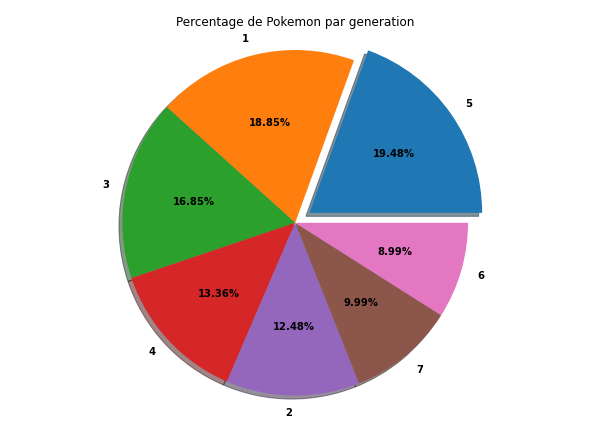

In [51]:
"""
Pour afficher le nombre de Pokémons présents dans chaque génération:
	 (1): Créer un dictionnaire qui contient la génération comme clé (de 1 à 7 ), le nombre de pokémons de cette génération en valeur.
	 (2): Extraire la liste des valeurs du dictionnaire "generation_count": nombre de pokémons par generation    
	 (3): Extraire la liste des clés du dictionnaire "generation_count" : les generations  
	 (4): Création de la figure de taille 8x6 
	 (5): Donner un titre à la figure    
	 (6): Positionner la figure (gauche, haut, droiten bas)
	 (7): diviser l'espace du cercle par 7 zones (generations) collés: 0 espace entre les zones (sauf la zone qui a le max des %)  
""" 

generation_count =  dict(df['generation'].value_counts()) # (1)
gen_counts = generation_count.values()                   # (2)
gen = generation_count .keys()                            # (3)
fig = plt.figure(figsize=(8, 6))                          # (4)
fig.suptitle("Percentage de Pokemon par generation")      # (5)
ax = fig.add_axes([0,0,1,1])                              # (6)
explode = (0.1, 0, 0, 0, 0, 0, 0)                         # (7)
ax.axis('equal')
plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode) # Créer la
"""
#Si on veut rajouter une légende: 
ax.legend(gen,
          title="Generation",
          loc="center left",
          bbox_to_anchor=(1, 0, 1, 1))

"""

plt.show()

### 3) Pourcentage des Pokémons Légendaires et non légendaires

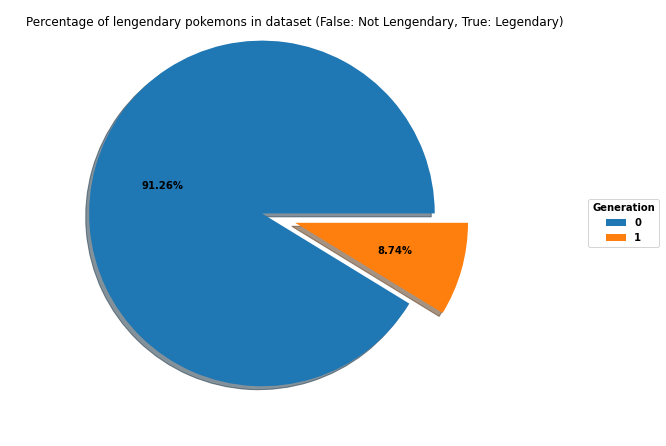

In [58]:
generation =  dict(df['is_legendary'].value_counts())
gen_counts = generation.values() 
gen = generation.keys()
fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of lengendary pokemons in dataset (False: Not Lengendary, True: Legendary)")
ax = fig.add_axes([0,0,1,1])
explode = (0.2, 0)  # explode 1st slice
ax.axis('equal')
plt.pie(gen_counts,autopct='%1.2f%%', shadow=True, explode=explode)

ax.legend(gen,
          title="Generation",
          loc="center left",
          bbox_to_anchor=(1, 0, 1, 1))


plt.show()


### 4) Etudier la correlation

In [10]:
# Etudier la correlation entre les variables: 
df2=df.iloc[:,18:39]
df2.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
attack,1.0,0.29,-0.18,0.72,-0.51,0.53,0.26,0.59,0.56,0.23,0.35,0.32,0.35,0.12,0.12,0.55,0.1,0.29
base_egg_steps,0.29,1.0,-0.36,0.4,-0.47,0.27,0.31,0.3,0.24,0.32,0.31,0.31,0.19,0.31,0.05,0.32,0.0029,0.45
base_happiness,-0.18,-0.36,1.0,-0.18,0.2,-0.15,-0.3,-0.23,-0.073,-0.11,-0.13,-0.11,-0.099,-0.24,-0.063,-0.25,-0.062,-0.29
base_total,0.72,0.4,-0.18,1.0,-0.71,0.69,0.27,0.7,0.73,0.24,0.73,0.75,0.53,0.11,0.17,0.62,0.091,0.44
capture_rate,-0.51,-0.47,0.2,-0.71,1.0,-0.49,-0.32,-0.52,-0.52,-0.42,-0.53,-0.55,-0.4,-0.11,-0.11,-0.46,-0.048,-0.43
defense,0.53,0.27,-0.15,0.69,-0.49,1.0,0.16,0.49,0.45,0.14,0.32,0.59,0.072,0.15,0.23,0.53,0.075,0.29
experience_growth,0.26,0.31,-0.3,0.27,-0.32,0.16,1.0,0.23,0.21,0.23,0.22,0.11,0.18,0.022,0.051,0.24,0.045,0.41
height_m,0.59,0.3,-0.23,0.7,-0.52,0.49,0.23,1.0,0.62,0.14,0.46,0.5,0.33,0.094,0.14,0.83,-0.091,0.24
hp,0.56,0.24,-0.073,0.73,-0.52,0.45,0.21,0.62,1.0,0.086,0.49,0.5,0.25,0.041,0.082,0.58,0.094,0.31
percentage_male,0.23,0.32,-0.11,0.24,-0.42,0.14,0.23,0.14,0.086,1.0,0.21,0.16,0.15,-0.045,-0.019,0.17,0.027,0.3


### 5) Etude de la colonne is_legendary en fonction des colonnes avec lesquelles elle a une forte correlation:

#### ---->  Type1 et Type2:

<Figure size 432x288 with 0 Axes>

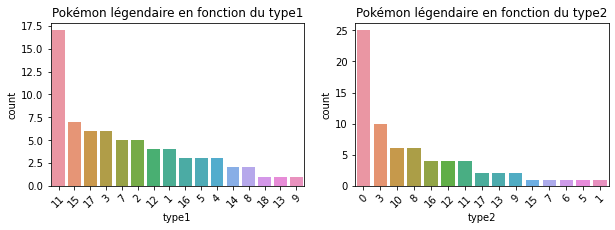

In [11]:
"""
legendary_df est une selection de df avec uniquement les Pokémons légendaires
Nous divisons la figure en 2 colonnes (une seule ligne, pour créer les deux diagrammes dans la meme figure. 
Puis créer le diagramme de type1 dans la position 1 et celui de type2 dans la figure2
"""
legendary_df = df[df['is_legendary'] == 1]
pyplot.gcf().subplots_adjust(wspace = 14, hspace = 10)

#Afficher un diagramme en barres du nombre de Pokémon légendaire en fonction du type1
fig1 = plt.figure(figsize = (10, 3))
ax = fig1.add_subplot(1,2, 1)
ax = sns.countplot(data=legendary_df , x = 'type1',order=legendary_df['type1'].value_counts().index)
ax.set_title('Pokémon légendaire en fonction du type1')  #Titre de la figure
plt.xticks(rotation=45)
st.pyplot(fig1) # Afficher le graphique

#Afficher un diagramme en barres du nombre de Pokémon légendaire en fonction du type2
ax = fig1.add_subplot(1,2, 2)
plt.title('Pokémon légendaire en fonction du type2')  #Titre de la figure
ax = sns.countplot(data=legendary_df , x = 'type2',order=legendary_df['type2'].value_counts().index)
plt.xticks(rotation=45)
st.pyplot(fig1)


#### ---->   Weight et height

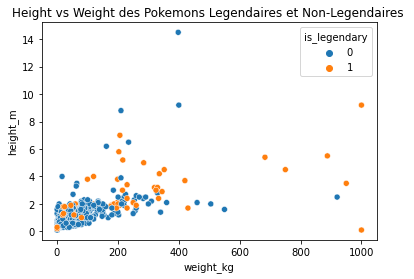

In [12]:
"""
scatterplot nous permet de créer un nuage de points à partir d'un dataframe, une colonne en axe x 
et une autre colonne en axe y.
Nous allons choisir le dataframe df, avec les colonnes weight et height, en fonction des Pokémons (is_legendary)

"""

fig3 = plt.figure()
plt.title('Height vs Weight des Pokemons Legendaires et Non-Legendaires ') #Titre de la figure
sns.scatterplot(data=df , x = 'weight_kg' , y = 'height_m' , hue='is_legendary')
st.pyplot(fig3)

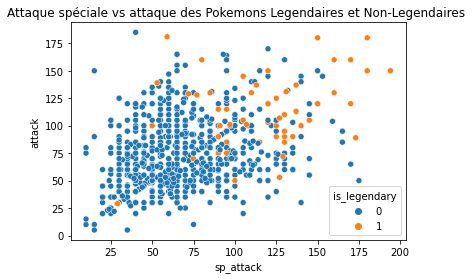

In [13]:
"""
Etude de la maniere d'attaque (special or not) de chaque pokémon (légendaire en orange)
"""

fig4 = plt.figure()
plt.title('Attaque spéciale vs attaque des Pokemons Legendaires et Non-Legendaires ')
sns.scatterplot(data=df, x='sp_attack',y='attack',hue='is_legendary')
st.pyplot(fig4)

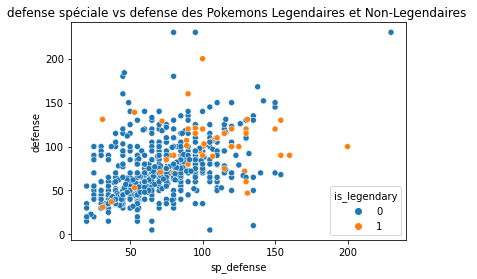

In [14]:
"""
Etude de la maniere défense (special or not) de chaque pokémon (légendaire en orange)
"""

fig5 = plt.figure()
plt.title('defense spéciale vs defense des Pokemons Legendaires et Non-Legendaires ')
sns.scatterplot(data=df, x='sp_defense',y='defense',hue='is_legendary')
st.pyplot(fig5)

#### ---->   Base Total

<ipython-input-15-2e05813cf9e9>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig1.add_subplot(1,2, 2)


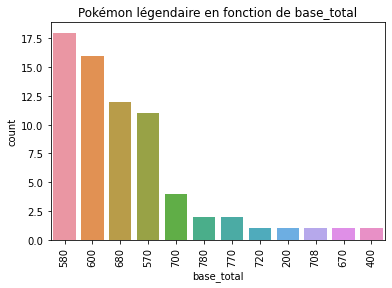

In [15]:
"""
 Diagrame en réctangle permettant de montrer le nombre de pokémons dans chaque base total.
"""
ax = fig1.add_subplot(1,2, 2)
plt.title('Pokémon légendaire en fonction de base_total')
ax = sns.countplot(data=legendary_df , x = 'base_total',order=legendary_df['base_total'].value_counts().index)
plt.xticks(rotation=90) #Pour l'affichage des valeurs sur l'axe x (base_total)
st.pyplot(fig1)

#### ---->    base_egg_steps

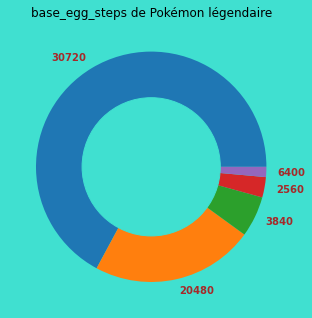

In [16]:
# Data
legendary_df['base_egg_steps'].unique()
base_egg_stepp =  dict(legendary_df['base_egg_steps'].value_counts()) 
base_egg_step_value = base_egg_stepp .values()                        
base_egg_step_key = base_egg_stepp .keys()                            

names=base_egg_step_key
size=legendary_df['base_egg_steps'].value_counts()

base_egg_step_value

# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('turquoise')
ax = fig.add_axes([0,0,1,1])
# Change color of text
plt.rcParams['text.color'] = 'brown'
plt.rcParams['font.weight'] = 'bold'
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='turquoise')
 
# Pieplot + circle on it
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.set_title("base_egg_steps de Pokémon légendaire")
plt.show()
plt.rcParams['text.color'] = 'black'


## Les Models de prédiction

### Random Forest

In [17]:
"""
  La fonction suivante nous permet de diviser le dataset en deux parties: une partie pour l'apprentissage 
  et construction du modele, une partie pour le test. 
  Elle nous retourne dans :
	 X_train ,  y_train: Les données d'apprentissage
	 X_test , y_test: Les données de test
Et cela grace à la fonction train_test_split

Pour faire le test, nous avons besoin des variables:
legendary_df: pour stoquer toutes les données des Pokémons Légendaires (sous forme de dataset) 
normal_df: pour stoquer toutes les données des Pokémons Non Légendaires tirés à partir de df de manière aléatoire. 
feature_list: qui prend la liste des colonnes sur lesquelles prédir le Pokémon.

"""
def clean_and_split(df):
    legendary_df = df[df['is_legendary'] == 1]                   # (1)
    normal_df = df[df['is_legendary'] == 0].sample(75)           # (2)
  
    feature_list = feautures                                     # (3)
    sub_df = pd.concat([legendary_df,normal_df])[feature_list]
    X = sub_df.loc[:, sub_df.columns != 'is_legendary']
    Y = sub_df['is_legendary']
 
    X_train, X_test , y_train , y_test = train_test_split(X ,Y ,random_state=1 ,test_size= 0.2 ,shuffle=True,stratify=Y) 
    return X_train , X_test , y_train , y_test


In [41]:
"""
C'est dans la fonction treatment_3 que nous allons appeler la fonction précédente et appliquer le model Random Forest 

"""
def treatment_3():    
    st.title('Random Forest')
    X_train , X_test , y_train , y_test = clean_and_split(df)
    st.subheader("Sample Data")
    st.dataframe(X_train.head(3))
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train , y_train)
    
    dt_prediction=model.predict(X_test)
    data = pd.DataFrame({'Actual': y_test, 'Predicted': dt_prediction})
    
    print('MAE:', metrics.mean_absolute_error(y_test, dt_prediction))
    print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_prediction)))
    
    st.title("Metrics")
    print("Model Score: {}".format(model.score(X_test , y_test)))
    print("Precision Score: {}".format(precision_score(model.predict(X_test) , y_test)))
    print("Recall Score: {}".format(recall_score(model.predict(X_test) , y_test)))

    st.title("Confusion Matrix")
    fig5 = plt.figure()
    conf_matrix = confusion_matrix(model.predict(X_test) , y_test)
    sns.heatmap(conf_matrix , annot=True , xticklabels=['Normal' , 'Legendary'] , yticklabels=['Normal' , 'Legendary'])
    plt.ylabel("True")
    plt.xlabel("Predicted")
    st.pyplot(fig5)


MAE: 0.034482758620689655
MSE: 0.034482758620689655
RMSE: 0.18569533817705186
Model Score: 0.9655172413793104
Precision Score: 1.0
Recall Score: 0.9333333333333333


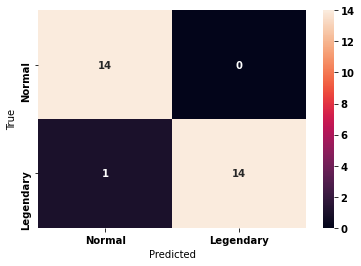

In [42]:
feautures = ['base_total','weight_kg' , 'height_m' , 'sp_attack' , 'attack' , 'sp_defense' , 'defense' , 'speed' , 'hp' , 'is_legendary']
treatment_3()

#### Autres tests:

MAE: 0.27586206896551724
MSE: 0.27586206896551724
RMSE: 0.5252257314388902
Model Score: 0.7241379310344828
Precision Score: 0.7857142857142857
Recall Score: 0.6875


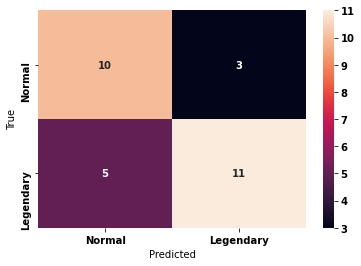

In [43]:
feautures= ['weight_kg' , 'height_m' , 'is_legendary']
treatment_3()

MAE: 0.10344827586206896
MSE: 0.10344827586206896
RMSE: 0.32163376045133846
Model Score: 0.896551724137931
Precision Score: 1.0
Recall Score: 0.8235294117647058


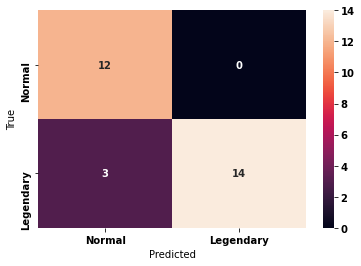

In [44]:
feautures= ['weight_kg' , 'height_m' , 'sp_attack' , 'attack' , 'is_legendary']
treatment_3()

MAE: 0.10344827586206896
MSE: 0.10344827586206896
RMSE: 0.32163376045133846
Model Score: 0.896551724137931
Precision Score: 0.9285714285714286
Recall Score: 0.8666666666666667


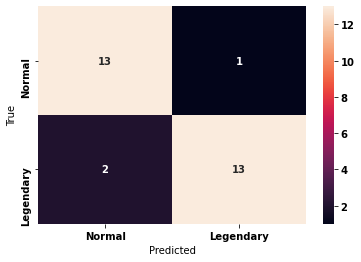

In [45]:
feautures= [ 'weight_kg' , 'height_m' , 'sp_attack' , 'attack','sp_defense' , 'defense' , 'is_legendary']
treatment_3()

MAE: 0.1724137931034483
MSE: 0.1724137931034483
RMSE: 0.41522739926869984
Model Score: 0.8275862068965517
Precision Score: 0.7857142857142857
Recall Score: 0.8461538461538461


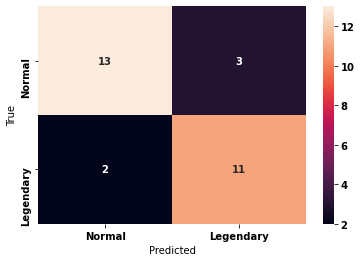

In [46]:
features = ['weight_kg' , 'height_m' , 'sp_attack' , 'attack' , 'sp_defense' , 'defense' , 'speed' , 'hp' , 'is_legendary']
treatment_3()

#### Prediction après etude de random forest:

### Arbre de decision 

MAE: 0.2413793103448276
MSE: 0.2413793103448276
RMSE: 0.4913036844405175
Le taut de succès de notre modele arbre de décision est:  0.7586206896551724


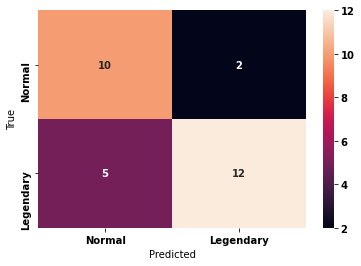

In [40]:
#Etape de l'apprentissage et appel a la fonction DecisionTreeClassifier:
X_train , X_test , y_train , y_test = clean_and_split(df)
df_tree = DecisionTreeClassifier (criterion="entropy", max_depth=4) 

#Faire l'apprentissage
df_tree.fit(X_train , y_train)
dt_prediction=df_tree.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': dt_prediction})

print('MAE:', metrics.mean_absolute_error(y_test, dt_prediction))
print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_prediction)))
#print('RSquare:', r2_score(y_test,dt_prediction))
#print('VIF:', 1/(1-r2_score(y_test,dt_prediction)))

#Affichage du taux de succès du modele:
print("Le taut de succès de notre modele arbre de décision est: ",metrics.accuracy_score(y_test,df_tree.predict(X_test)))

#Affichage de la matrice de confusion 
fig5 = plt.figure()
conf_matrix = confusion_matrix(df_tree.predict(X_test) , y_test)
sns.heatmap(conf_matrix , annot=True , xticklabels=['Normal' , 'Legendary'] , yticklabels=['Normal' , 'Legendary'])
plt.ylabel("True")
plt.xlabel("Predicted")
st.pyplot(fig5)

### Conclusion